Import Libraries

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gs
from matplotlib import rc
import seaborn as sns
% matplotlib inline

UsageError: Line magic function `%` not found.


Import Data

In [2]:
data = pd.read_csv("C:/Users/user/Documents/Data Visualization/MTP DF CSV.csv")

In [3]:
data.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

Data Summary

In [5]:
data.RecruitmentSource.value_counts()

Indeed                     87
LinkedIn                   76
Google Search              49
Employee Referral          31
Diversity Job Fair         29
CareerBuilder              23
Website                    13
Other                       2
On-line Web application     1
Name: RecruitmentSource, dtype: int64

In [6]:
data.Sex.value_counts()

F     176
M     135
Name: Sex, dtype: int64

In [7]:
data.RaceDesc.value_counts()

White                               187
Black or African American            80
Asian                                29
Two or more races                    11
American Indian or Alaska Native      3
Hispanic                              1
Name: RaceDesc, dtype: int64

In [8]:
gender = data[["RecruitmentSource", "GenderID", "Sex", "RaceDesc"]]

In [9]:
gender1 = gender.groupby(['RecruitmentSource','Sex']).size().reset_index(name='counts')
gender1

,RecruitmentSource,Sex,counts
0,CareerBuilder,F,16
1,CareerBuilder,M,7
2,Diversity Job Fair,F,15
3,Diversity Job Fair,M,14
4,Employee Referral,F,11
5,Employee Referral,M,20
6,Google Search,F,33
7,Google Search,M,16
8,Indeed,F,50
9,Indeed,M,37


In [10]:
race = data[["RecruitmentSource", "RaceDesc"]]

In [11]:
race1 = race.groupby(['RecruitmentSource','RaceDesc']).size().reset_index(name='counts')
race1

,RecruitmentSource,RaceDesc,counts
0,CareerBuilder,Asian,2
1,CareerBuilder,Black or African American,5
2,CareerBuilder,White,16
3,Diversity Job Fair,Black or African American,29
4,Employee Referral,Asian,1
5,Employee Referral,Black or African American,5
6,Employee Referral,White,25
7,Google Search,American Indian or Alaska Native,1
8,Google Search,Asian,7
9,Google Search,Black or African American,4


In [12]:
gender1 = gender1.sort_values('counts')
gender1

,RecruitmentSource,Sex,counts
14,Other,M,1
13,Other,F,1
12,On-line Web application,M,1
15,Website,F,6
16,Website,M,7
1,CareerBuilder,M,7
4,Employee Referral,F,11
3,Diversity Job Fair,M,14
2,Diversity Job Fair,F,15
0,CareerBuilder,F,16


In [13]:
race1 = race1.sort_values('counts')
race1

,RecruitmentSource,RaceDesc,counts
23,On-line Web application,White,1
27,Website,Two or more races,1
18,LinkedIn,American Indian or Alaska Native,1
25,Website,Asian,1
4,Employee Referral,Asian,1
12,Indeed,American Indian or Alaska Native,1
7,Google Search,American Indian or Alaska Native,1
15,Indeed,Hispanic,1
10,Google Search,Two or more races,2
0,CareerBuilder,Asian,2


In [14]:
gender1 = gender1.groupby(['RecruitmentSource', 'Sex'])['counts'].sum().unstack()
gender1

Sex,F,M
RecruitmentSource,,
CareerBuilder,16.0,7.0
Diversity Job Fair,15.0,14.0
Employee Referral,11.0,20.0
Google Search,33.0,16.0
Indeed,50.0,37.0
LinkedIn,44.0,32.0
On-line Web application,NaN,1.0
Other,1.0,1.0
Website,6.0,7.0


In [15]:
race1 = race1.groupby(['RecruitmentSource', 'RaceDesc'])['counts'].sum().unstack()
race1

RaceDesc,American Indian or Alaska Native,Asian,Black or African American,Hispanic,Two or more races,White
RecruitmentSource,,,,,,
CareerBuilder,NaN,2.0,5.0,NaN,NaN,16.0
Diversity Job Fair,NaN,NaN,29.0,NaN,NaN,NaN
Employee Referral,NaN,1.0,5.0,NaN,NaN,25.0
Google Search,1.0,7.0,4.0,NaN,2.0,35.0
Indeed,1.0,10.0,17.0,1.0,4.0,54.0
LinkedIn,1.0,8.0,16.0,NaN,4.0,47.0
On-line Web application,NaN,NaN,NaN,NaN,NaN,1.0
Other,NaN,NaN,NaN,NaN,NaN,2.0
Website,NaN,1.0,4.0,NaN,1.0,7.0


In [16]:
gender1 = gender1.fillna(0)
gender1

Sex,F,M
RecruitmentSource,,
CareerBuilder,16.0,7.0
Diversity Job Fair,15.0,14.0
Employee Referral,11.0,20.0
Google Search,33.0,16.0
Indeed,50.0,37.0
LinkedIn,44.0,32.0
On-line Web application,0.0,1.0
Other,1.0,1.0
Website,6.0,7.0


In [17]:
race1 = race1.fillna(0)
race1

RaceDesc,American Indian or Alaska Native,Asian,Black or African American,Hispanic,Two or more races,White
RecruitmentSource,,,,,,
CareerBuilder,0.0,2.0,5.0,0.0,0.0,16.0
Diversity Job Fair,0.0,0.0,29.0,0.0,0.0,0.0
Employee Referral,0.0,1.0,5.0,0.0,0.0,25.0
Google Search,1.0,7.0,4.0,0.0,2.0,35.0
Indeed,1.0,10.0,17.0,1.0,4.0,54.0
LinkedIn,1.0,8.0,16.0,0.0,4.0,47.0
On-line Web application,0.0,0.0,0.0,0.0,0.0,1.0
Other,0.0,0.0,0.0,0.0,0.0,2.0
Website,0.0,1.0,4.0,0.0,1.0,7.0


In [18]:
gender1 = gender1.reset_index().rename_axis(None, axis=1)
gender1

,RecruitmentSource,F,M
0,CareerBuilder,16.0,7.0
1,Diversity Job Fair,15.0,14.0
2,Employee Referral,11.0,20.0
3,Google Search,33.0,16.0
4,Indeed,50.0,37.0
5,LinkedIn,44.0,32.0
6,On-line Web application,0.0,1.0
7,Other,1.0,1.0
8,Website,6.0,7.0


In [19]:
gender1 = gender1.sort_values('F', axis=0, ascending=False)
gender1

,RecruitmentSource,F,M
4,Indeed,50.0,37.0
5,LinkedIn,44.0,32.0
3,Google Search,33.0,16.0
0,CareerBuilder,16.0,7.0
1,Diversity Job Fair,15.0,14.0
2,Employee Referral,11.0,20.0
8,Website,6.0,7.0
7,Other,1.0,1.0
6,On-line Web application,0.0,1.0


In [20]:
race1 = race1.sort_values('White', axis=0, ascending=False)
race1

RaceDesc,American Indian or Alaska Native,Asian,Black or African American,Hispanic,Two or more races,White
RecruitmentSource,,,,,,
Indeed,1.0,10.0,17.0,1.0,4.0,54.0
LinkedIn,1.0,8.0,16.0,0.0,4.0,47.0
Google Search,1.0,7.0,4.0,0.0,2.0,35.0
Employee Referral,0.0,1.0,5.0,0.0,0.0,25.0
CareerBuilder,0.0,2.0,5.0,0.0,0.0,16.0
Website,0.0,1.0,4.0,0.0,1.0,7.0
Other,0.0,0.0,0.0,0.0,0.0,2.0
On-line Web application,0.0,0.0,0.0,0.0,0.0,1.0
Diversity Job Fair,0.0,0.0,29.0,0.0,0.0,0.0


In [21]:
gender1.rename(columns = {'M ':'M'},inplace=True)
gender1

,RecruitmentSource,F,M
4,Indeed,50.0,37.0
5,LinkedIn,44.0,32.0
3,Google Search,33.0,16.0
0,CareerBuilder,16.0,7.0
1,Diversity Job Fair,15.0,14.0
2,Employee Referral,11.0,20.0
8,Website,6.0,7.0
7,Other,1.0,1.0
6,On-line Web application,0.0,1.0


Plot the Graphs

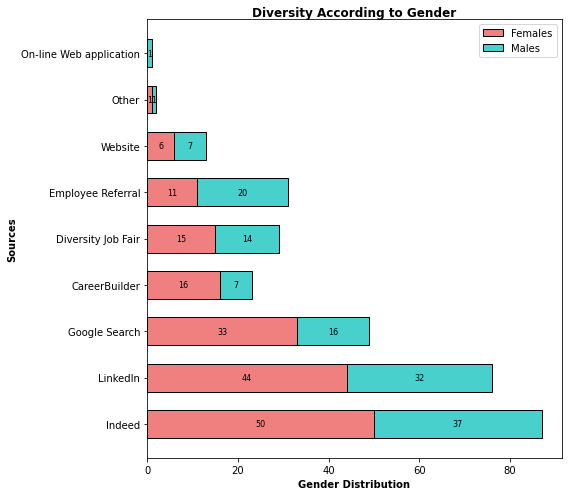

In [25]:
fig = plt.figure(figsize=(8, 7))
ax = fig.add_subplot(1, 1, 1)
width = 0.6

ax.barh(gender1.RecruitmentSource, gender1["F"], width, label='Females', color='lightcoral', edgecolor='black')
ax.barh(gender1.RecruitmentSource, gender1["M"], width, left=gender1["F"], label='Males', color='mediumturquoise', edgecolor='black')

ax.set_ylabel('Sources',fontweight='bold',fontsize=10)
ax.set_xlabel('Gender Distribution',fontweight='bold',fontsize=10)
ax.set_title('Diversity According to Gender',fontweight='bold',fontsize=12,va='center')
ax.legend()

for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    if width > 0:
         ax.annotate(f'{width:0.0f}', xy=(left+width/2, bottom+height/2), ha='center',fontsize=8, va='center')
            
ax.legend(loc='best')
fig.tight_layout()

plt.show()

fig.savefig("Diversity According to Gender.jpg")

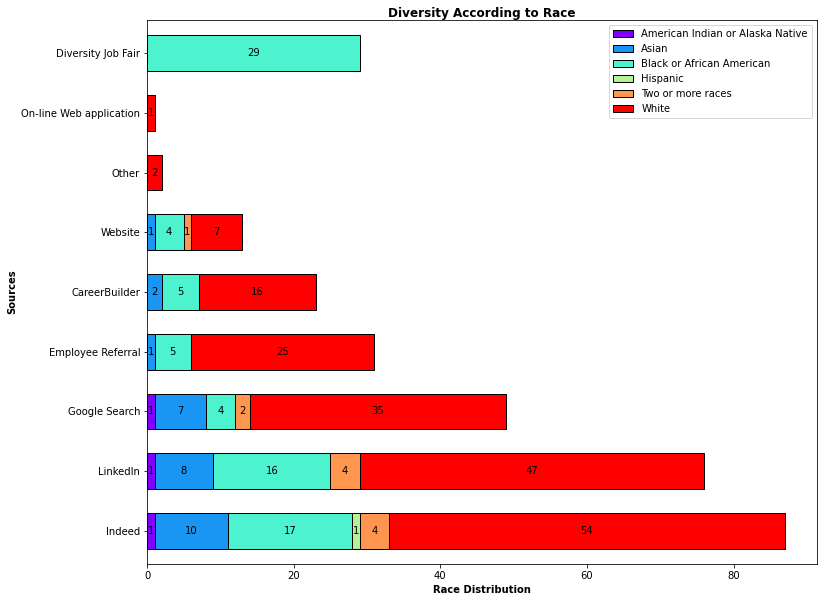

In [26]:
ax = race1.plot.barh(stacked=True, cmap='rainbow', figsize=(12, 10), edgecolor='black', width=0.60)

for c in ax.containers:

    # format the number of decimal places and replace 0 with an empty string
    labels = [f'{w:.0f}' if (w := v.get_width()) > 0 else '' for v in c ]
    
    ax.bar_label(c, labels=labels, label_type='center')
    
ax.set_ylabel('Sources',fontweight='bold',fontsize=10)
ax.set_xlabel('Race Distribution',fontweight='bold',fontsize=10)
ax.set_title('Diversity According to Race',fontweight='bold',fontsize=12,va='center')
ax.legend()

plt.savefig("Diversity According to Race")